In [40]:
#cnn
import tensorflow as tf


In [41]:
mnist=tf.keras.datasets.mnist

# Modified National Institute of Standards and Technology database 

# It has a collection of greyscall images with handwritten digits from 0 to 9

In [42]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\naras\\AppData\\Roaming\\Python\\Python311\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [43]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

In [44]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')])

In [45]:
# x_train,x_test=x_train/255.0,x_test/255.0
#1.) Why to divide by 255
# When we are working with image data,the pixel values are integers in the range [0,255].
# So divide it by 255.0 scales these values to the range [0,1]
# Working with the smaller values increase the stability of optimization algorithm

# tf.keras.layers.Dense(128,activation='relu')
#2.)Why 128 
# It is the specific number of nuerons or units in the dense layer
# relu -->Rectified Linear Unit,It helps to add non-lib=nearity to our algorithm

In [46]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [47]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2985 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1447 - accuracy: 0.9573
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1091 - accuracy: 0.9663
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0883 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0768 - accuracy: 0.9757


In [48]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0814 - accuracy: 0.9755


In [49]:
print(test_loss)
print(test_accuracy)

0.08138218522071838
0.9754999876022339


In [50]:
# Project:1
# convert image to greyscall CNN
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [51]:
#load the rgb image
image_path=r"C:\Users\naras\Downloads\Telegram Desktop\The GOAT.jpg"
original_image=load_img(image_path,target_size=(224,224,3))
original_array=img_to_array(original_image)
original_array=original_array/255.0
print(original_array)

[[[0.         0.01176471 0.01568628]
  [0.01176471 0.01960784 0.01568628]
  [0.01960784 0.01960784 0.01960784]
  ...
  [0.         0.01568628 0.01960784]
  [0.         0.01568628 0.01960784]
  [0.         0.01568628 0.01960784]]

 [[0.         0.01568628 0.01176471]
  [0.01568628 0.02352941 0.01960784]
  [0.03137255 0.02745098 0.01960784]
  ...
  [0.         0.01568628 0.01960784]
  [0.         0.01568628 0.01960784]
  [0.         0.01568628 0.01960784]]

 [[0.00392157 0.01960784 0.01568628]
  [0.02745098 0.02745098 0.02745098]
  [0.0627451  0.04313726 0.03137255]
  ...
  [0.         0.01568628 0.01960784]
  [0.         0.01568628 0.01960784]
  [0.         0.01568628 0.01960784]]

 ...

 [[0.2627451  0.3372549  0.11764706]
  [0.31764707 0.39607844 0.11764706]
  [0.32156864 0.4117647  0.13725491]
  ...
  [0.10196079 0.20784314 0.00784314]
  [0.05882353 0.14117648 0.16078432]
  [0.07450981 0.10980392 0.00392157]]

 [[0.25882354 0.33333334 0.07450981]
  [0.28627452 0.3529412  0.07843138]


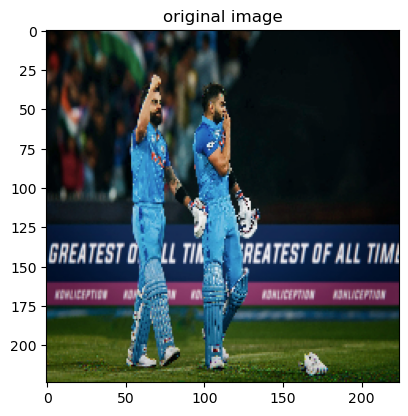

In [52]:
plt.figure(figsize=(10,300))
plt.subplot(1,2,1)
plt.title("original image")
plt.imshow(original_array)

In [53]:
#convert image to grey scale
model=models.Sequential()
model.add(layers.Conv2D(1,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(layers.MaxPooling2D(2,2))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 1)       28        
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 1)       0         
 D)                                                              
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 88ms/step


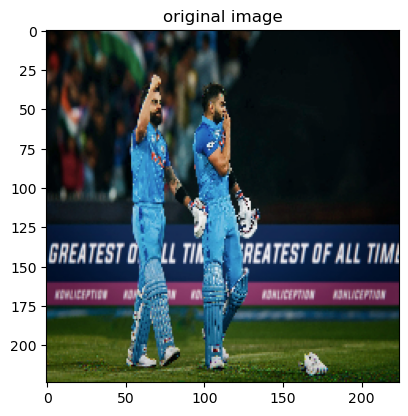

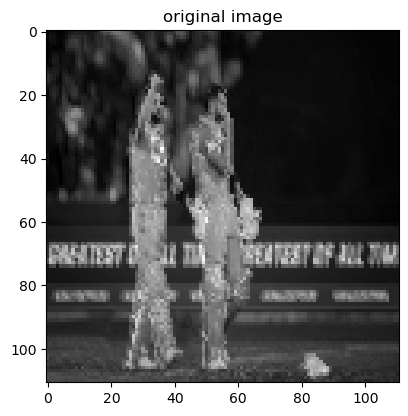

In [54]:
# To reshape the image
input_image=np.expand_dims(original_array,axis=0)
greyscale=model.predict(input_image)

plt.figure(figsize=(10,300))
plt.subplot(1,2,1)
plt.title("original image")
plt.imshow(original_array)

plt.figure(figsize=(10,300))
plt.subplot(1,2,1)
plt.title("original image")
plt.imshow(np.squeeze(greyscale),cmap='gray')

In [55]:
#PROJECT 2:
#DETECT FLOWERS BASED ON IMAGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# Model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [64]:
X=[]
Z=[]
IMG_SIZE=150

FLOWER_DAISEY_DIR =r"C:\Users\naras\OneDrive\Desktop\flowerdset\train\daisy"
FLOWER_SUNFLOWER_DIR =r"C:\Users\naras\OneDrive\Desktop\flowerdset\train\sunflower"
FLOWER_TULIP_DIR=r"C:\Users\naras\OneDrive\Desktop\flowerdset\train\tulip"
FLOWER_DANDI_DIR =r"C:\Users\naras\OneDrive\Desktop\flowerdset\train\dandelion"
FLOWER_ROSE_DIR =r"C:\Users\naras\OneDrive\Desktop\flowerdset\train\rose"

In [65]:
def assign_label(img, flower_type):
 return flower_type 

In [66]:
  # tqdm --> It creates a progress bar from the loop
!pip install opencv-python
!pip install tqdm
# Rest of your code...

def make_train_data(flower_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, flower_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))  

In [67]:
make_train_data('Daisy', FLOWER_DAISEY_DIR)
print(len(X))

100%|██████████| 501/501 [00:00<00:00, 507.65it/s]

501


In [68]:
make_train_data('Sunflower', FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 495/495 [00:01<00:00, 434.79it/s]

996


In [69]:
make_train_data('Tulip', FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 582/582 [00:01<00:00, 421.29it/s]

1578


In [71]:
make_train_data('Dandelion', FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 646/646 [00:01<00:00, 450.46it/s]

2224


In [72]:
make_train_data('Rose', FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 497/497 [00:01<00:00, 449.91it/s]

2721


C:\Users\naras\AppData\Local\Temp\ipykernel_74076\3155540616.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


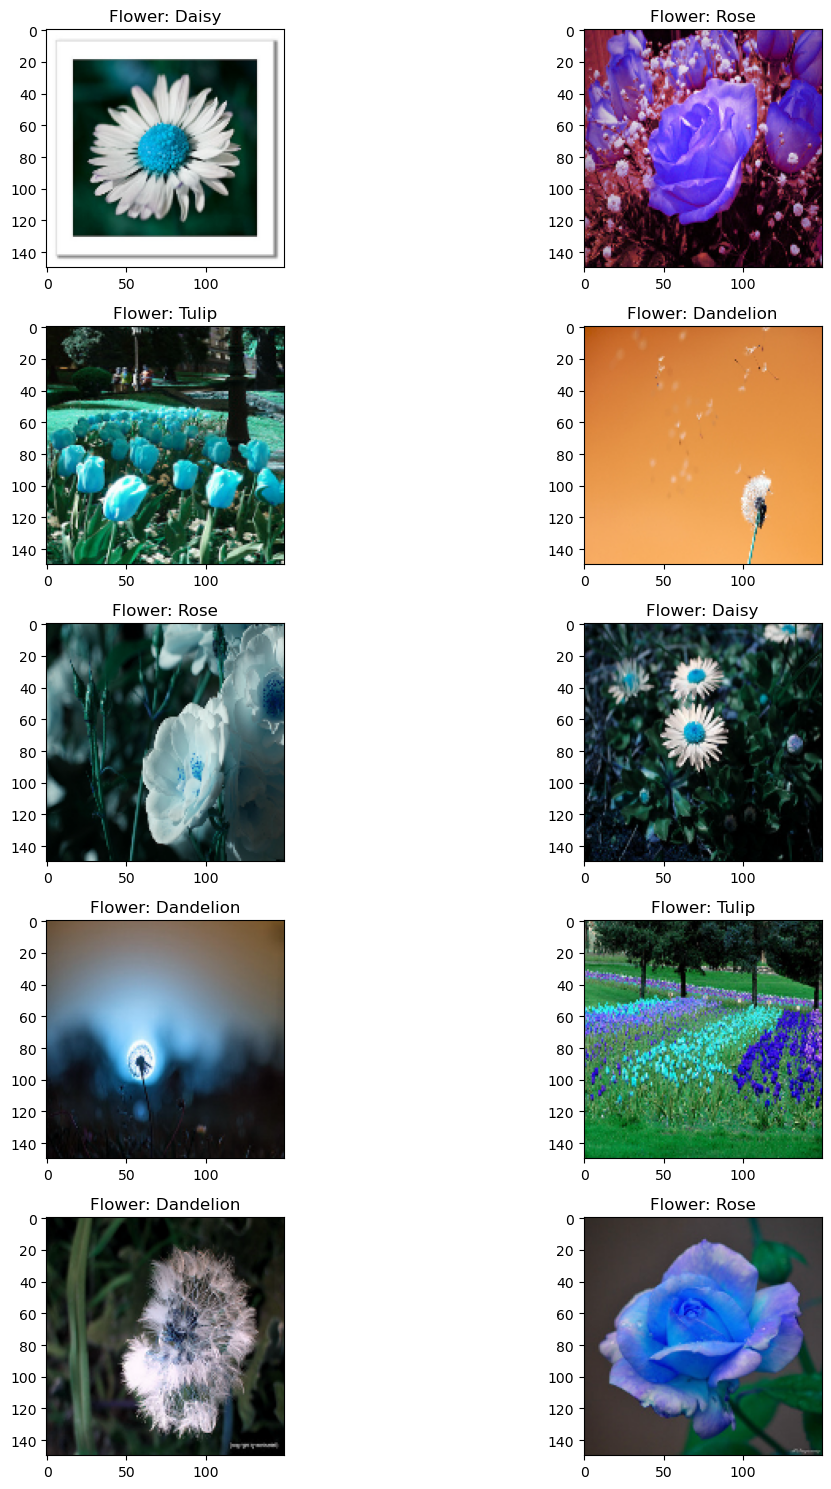

In [73]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)

for row in range(5):
  for col in range(2):
    l= rn.randint(0, len(Z))
    ax[row, col].imshow(X[l])
    ax[row, col].set_title("Flower: "+Z[l])

  plt.tight_layout()